# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
def f1(x, y, z):
  return -2*x*y + z - x - 1

def f2(x, y, z):
  return -1/2 - y - x/z

def rk4(f, p, h, xn):
  x = p[0]
  y = p[1]
  z = p[2]
  x_values = []
  y_values = []
  z_values = []
  while x < xn:
    k1 = [h * fn(x, y, z) for fn in f]
    k2 = [h * fn(x + h/2, y + k1[0]/2, z + k1[1]/2) for fn in f]
    k3 = [h * fn(x + h/2, y + k2[0]/2, z + k2[1]/2) for fn in f]
    k4 = [h * fn(x + h, y + k3[0], z + k3[1]) for fn in f]
    z += (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
    y += (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
    x_values.append(x)
    y_values.append(y)
    z_values.append(z)
    x += h
  return x_values, y_values, z_values

def rk2(f, p, h, xn):
    x = p[0]
    y = p[1]
    z = p[2]
    x_values = []
    y_values = []
    z_values = []
    while x < xn:
      k1 = [h * fn(x, y, z) for fn in f]
      k2 = [h * fn(x + h, y + k1[0], z + k1[1]) for fn in f]
      y += (k1[0] + k2[0]) / 2
      z += (k1[1] + k2[1]) / 2
      x_values.append(x)
      y_values.append(y)
      z_values.append(z)
      x += h
    return x_values, y_values, z_values



# Task

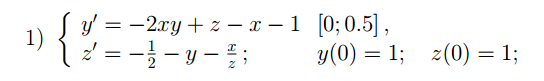

# Runge Kutta (O2)

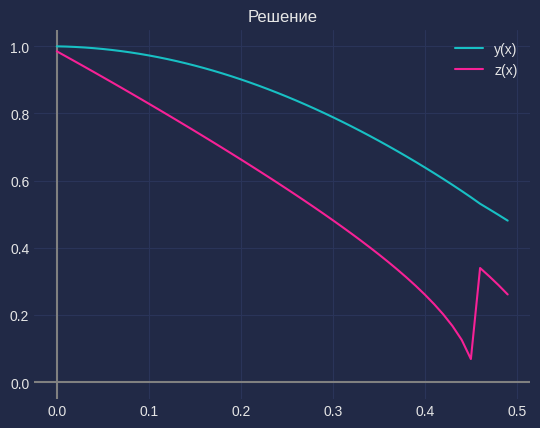

In [ ]:
# https://www.mathstools.com/section/main/runge_kutta_calculator
x0 = 0
y0 = 1
z0 = 1
h = 0.01
xn = 0.5

x, y, z = rk2([f1, f2], [x0, y0, z0], h, xn)

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Решение')
plt.plot(x, y, label='y(x)')
plt.plot(x, z, label='z(x)')
ax.legend()

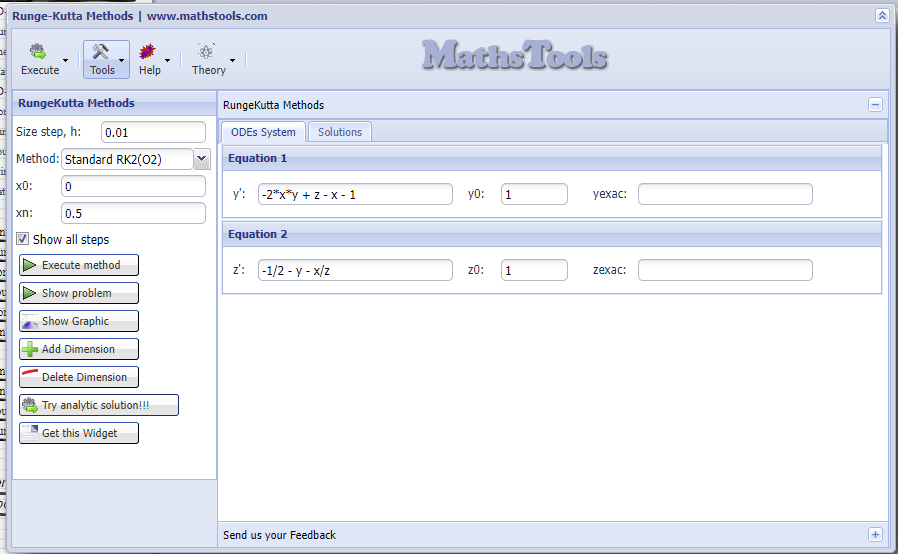

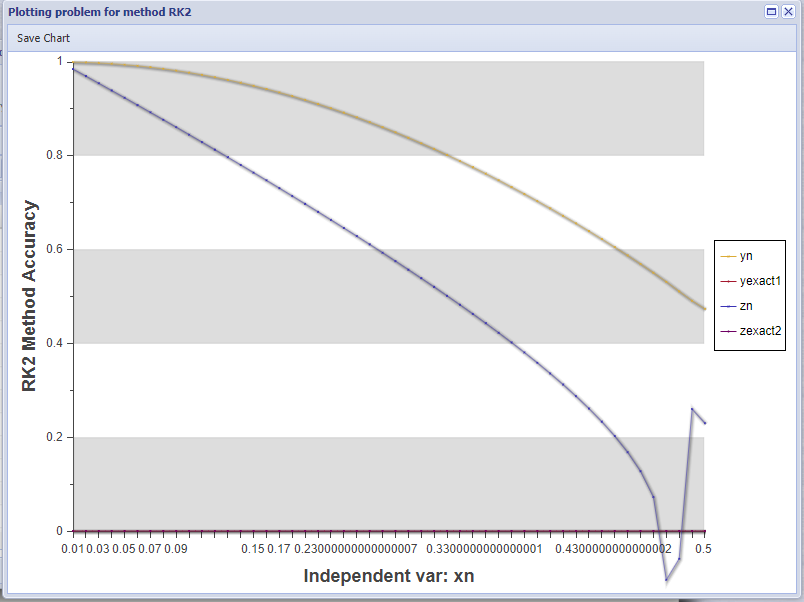

# Runge Kutta (O4)

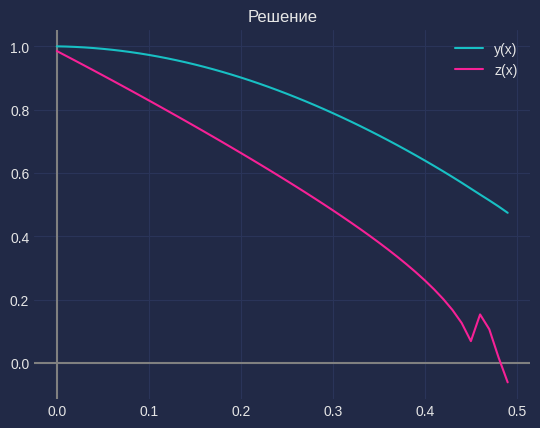

In [ ]:
# https://www.mathstools.com/section/main/runge_kutta_calculator
x0 = 0
y0 = 1
z0 = 1
h = 0.01
xn = 0.5

x, y, z = rk4([f1, f2], [x0, y0, z0], h, xn)

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Решение')
plt.plot(x, y, label='y(x)')
plt.plot(x, z, label='z(x)')
ax.legend()

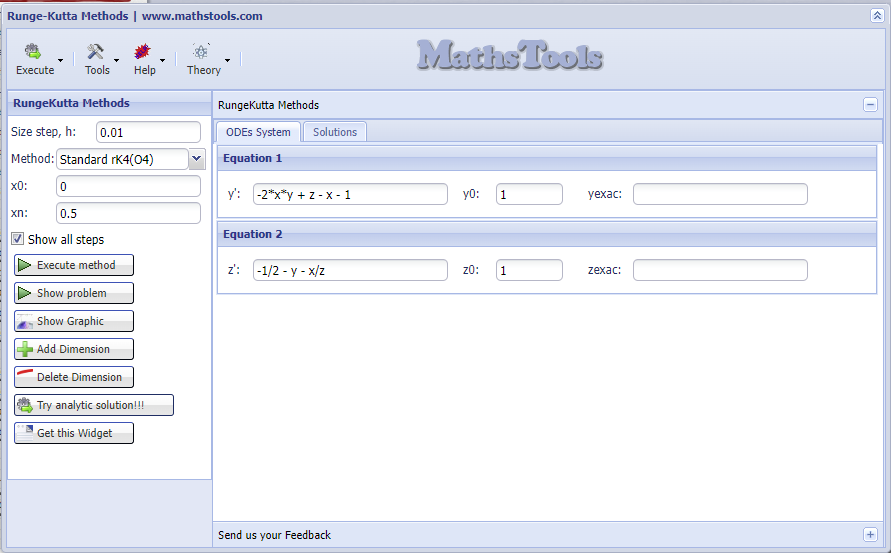

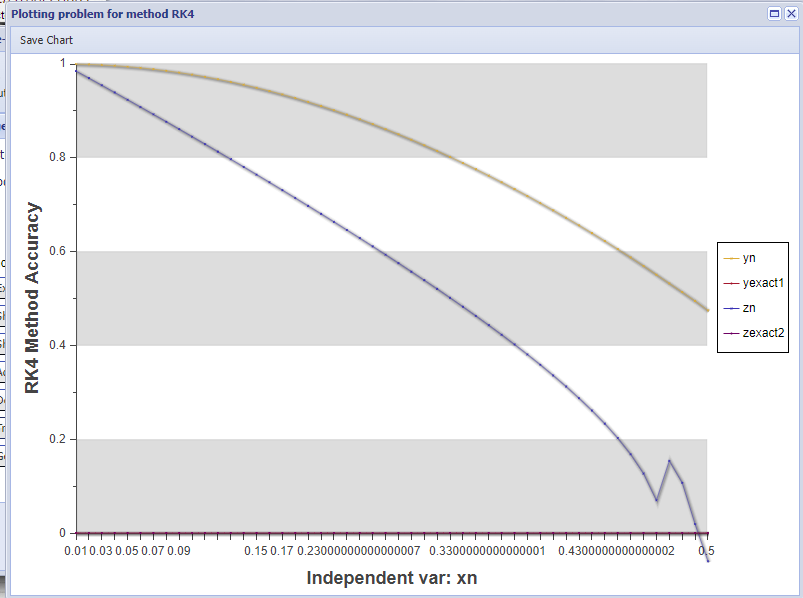

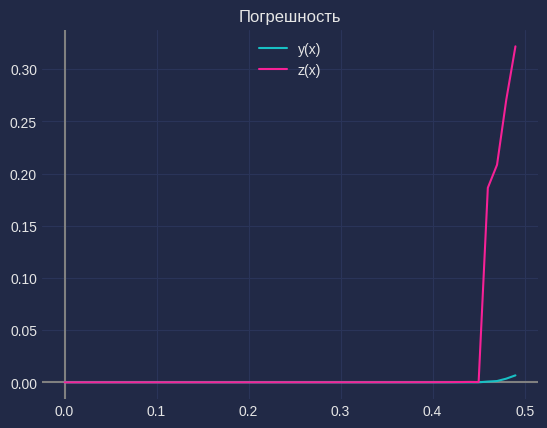

In [ ]:
# https://www.mathstools.com/section/main/runge_kutta_calculator
x0 = 0
y0 = 1
z0 = 1
h = 0.01
xn = 0.5


x1, y1, z1 = rk4([f1, f2], [x0, y0, z0], h, xn)
x2, y2, z2 = rk2([f1, f2], [x0, y0, z0], h, xn)
x_values, y_values, z_values = [], [], []
for x, _y1, _z1, _y2, _z2 in zip(x1, y1, z1, y2, z2):
  x_values.append(x)
  y_values.append(abs(_y1 - _y2))
  z_values.append(abs(_z1 - _z2))

fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Погрешность')
plt.plot(x_values, y_values, label='y(x)')
plt.plot(x_values, z_values, label='z(x)')
ax.legend()